In [1]:
%matplotlib inline
import pandas as pd
import os
import matplotlib as plt
import seaborn as sns
import numpy as np
import statsmodels.formula.api as sm

In [2]:
#custom style HTML output

from IPython.core.display import HTML

csspath1 = r'C:\COURSERA\PYCON2015_TUTORIALS\Brandon Rhodes - Pandas From The Ground Up - PyCon 2015\style-table.css'
csspath2 = r'C:\COURSERA\PYCON2015_TUTORIALS\Brandon Rhodes - Pandas From The Ground Up - PyCon 2015\style-notebook.css'

css = open(csspath1).read() + open(csspath2).read()
HTML('<style>{}</style>'.format(css))

In [3]:
statedata = pd.read_csv('DATA/statedata.csv',)

In [4]:
statedata.shape

(50, 15)

In [5]:
statedata.rename(columns={'Life.Exp': 'LifeExp',
                          'HS.Grad': 'HSGrad',
                         'state.abb':'stateabb',
                         'state.division':'statediv',
                         'state.name':'statename',
                         'state.region':'stateregion',
                         'state.area':'statearea'}, inplace=True)

In [6]:
statedata.dtypes

Population       int64
Income           int64
Illiteracy     float64
LifeExp        float64
Murder         float64
HSGrad         float64
Frost            int64
Area             int64
stateabb        object
statearea        int64
x              float64
y              float64
statediv        object
statename       object
stateregion     object
dtype: object

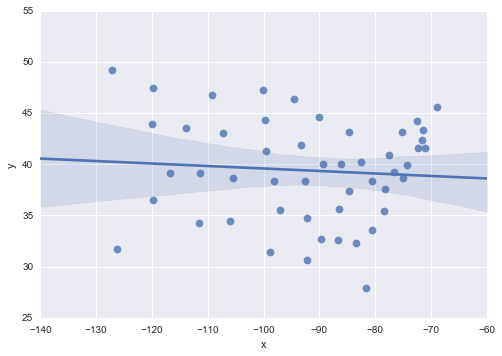

In [7]:
# We begin by exploring the data. Plot all of the states' 
# centers with latitude on the y axis (the "y" variable in 
# our dataset) and longitude on the x axis (the "x" variable 
# in our dataset). The shape of the plot should look like 
# the outline of the United States! Note that Alaska and 
# Hawaii have had their coordinates adjusted to appear 
# just off of the west coast.

sns.regplot(statedata.x,statedata.y,scatter_kws={"s": 60})

In [8]:
# Determine which region of the US (West, North Central, South, 
# or Northeast) has the highest average high school graduation 
# rate of all the states in the region.

statedata.groupby(['stateregion'])['HSGrad'].mean().sort_values(ascending=False)

stateregion
West             62.000000
North Central    54.516667
Northeast        53.966667
South            44.343750
Name: HSGrad, dtype: float64

In [9]:
# Which region has the highest median murder rate?

statedata.groupby(['stateregion'])['Murder'].median().sort_values(ascending=False)

stateregion
South            10.85
West              6.80
North Central     3.75
Northeast         3.30
Name: Murder, dtype: float64

'0.7.0'

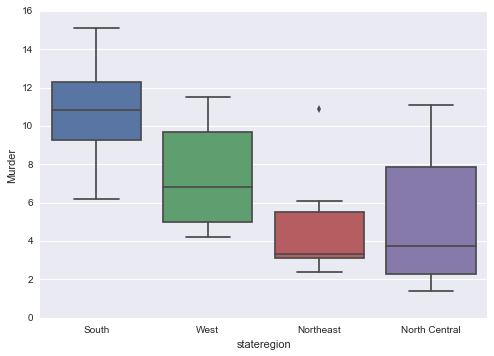

In [10]:
# Now, make a boxplot of the murder rate by region

sns.boxplot(x='stateregion',y='Murder',data=statedata)
sns.__version__ # need a recent version (0.7.0) of seaborn for this

In [11]:
# You should see that there is an outlier in the Northeast 
# region of the boxplot you just generated. Which state 
# does this correspond to? (Hint: There are many ways 
# to find the answer to this question, but one way is 
# to use the subset command to only look at the Northeast data.)

df1 = statedata[statedata['stateregion'] == 'Northeast']

df1[['Murder','stateabb']].sort_values('Murder',ascending=False)

,Murder,stateabb
31,10.9,NY
37,6.1,PA
44,5.5,VT
29,5.2,NJ
20,3.3,MA
28,3.3,NH
6,3.1,CT
18,2.7,ME
38,2.4,RI


In [12]:
statedata.columns

Index(['Population', 'Income', 'Illiteracy', 'LifeExp', 'Murder', 'HSGrad',
       'Frost', 'Area', 'stateabb', 'statearea', 'x', 'y', 'statediv',
       'statename', 'stateregion'],
      dtype='object')

In [13]:
# We would like to build a model to predict life expectancy 
# by state using the state statistics we have in our dataset.

# Build the model with all potential variables included 
# (Population, Income, Illiteracy, Murder, HS.Grad, Frost, 
#  and Area). Note that you should use the variable "Area" 
# in your model, NOT the variable "state.area".

formula = 'LifeExp ~ Population + Income + Illiteracy + Murder + HSGrad + Frost + Area'

linreg_model1 = sm.ols(formula=formula,data=statedata).fit()
print(linreg_model1.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.692   
Dependent Variable: LifeExp          AIC:                119.7092
Date:               2016-05-02 22:35 BIC:                135.0054
No. Observations:   50               Log-Likelihood:     -51.855 
Df Model:           7                F-statistic:        16.74   
Df Residuals:       42               Prob (F-statistic): 2.53e-10
R-squared:          0.736            Scale:              0.55469 
------------------------------------------------------------------
               Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
------------------------------------------------------------------
Intercept     70.9432    1.7480  40.5859  0.0000  67.4157  74.4708
Population     0.0001    0.0000   1.7748  0.0832  -0.0000   0.0001
Income        -0.0000    0.0002  -0.0892  0.9293  -0.0005   0.0005
Illiteracy     0.0338    0.3663   0.0923  0.9269  -0.7054   0.7730
Murder        -0.301

In [14]:
# What is the coefficient for "Income" in your linear regression model?

linreg_model1.params.Income

-2.1804237825235467e-05

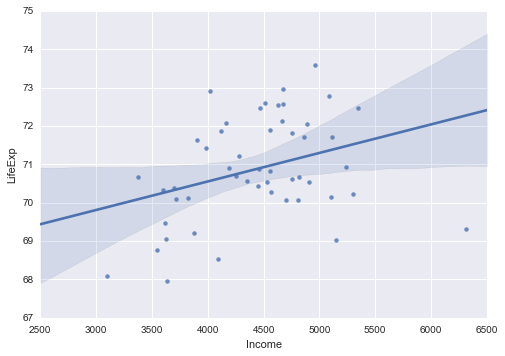

In [15]:
# Plot a graph of life expectancy vs. income

sns.regplot(x='Income',y='LifeExp',data=statedata)

In [16]:
# You should be able to find a good model with only 4 independent 
# variables, instead of the original 7. Which variables does this 
# model contain?

def lm(df,formula):
    linreg_model = sm.ols(formula=formula,data=df).fit()
    top_pvalue_var = linreg_model.pvalues[1:].sort_values(ascending=False).index[0]
    print("======== Variable with highest p-value --> {} <--- ======== \n".format(top_pvalue_var))
    print(linreg_model.summary2())
    return linreg_model

linreg_model2 = lm(statedata,'LifeExp ~ Frost + HSGrad + Murder + Population')

======== Variable with highest p-value --> Population <--- ======== 

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.713   
Dependent Variable: LifeExp          AIC:                113.7326
Date:               2016-05-02 22:35 BIC:                123.2927
No. Observations:   50               Log-Likelihood:     -51.866 
Df Model:           4                F-statistic:        31.37   
Df Residuals:       45               Prob (F-statistic): 1.70e-12
R-squared:          0.736            Scale:              0.51796 
------------------------------------------------------------------
               Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
------------------------------------------------------------------
Intercept     71.0271    0.9529  74.5415  0.0000  69.1080  72.9463
Frost         -0.0059    0.0024  -2.4550  0.0180  -0.0108  -0.0011
HSGrad         0.0466    0.0148   3.1417  0.0030   0.0167   0.0764
Murder        -0.

In [143]:
# Using the simplified 4 variable model that we created, we'll now 
# take a look at how our predictions compare to the actual values.

# Take a look at the vector of predictions by using the predict 
# function (since we are just looking at predictions on the 
# training set, you don't need to pass a "data" argument 
# to the predict function).

# Which state do we predict to have the lowest life expectancy? 

pred = pd.DataFrame([statedata.stateabb.values,linreg_model2.fittedvalues],
                   index=['state','life_exp_pred']).transpose() 
                   #note: using index= instead of column= because we use transpose
    
pred.sort_values('life_exp_pred',ascending=False).tail(1)

,state,life_exp_pred
0,AL,68.4811


In [139]:
# Which state actually has the lowest life expectancy?

real = pd.DataFrame([statedata.stateabb.values,statedata.LifeExp.values],
                   index=['state','life_exp_real']).transpose() 
                   #note: using index= instead of column= because we use transpose

real.sort_values('life_exp_real',ascending=False).tail(1)

,state,life_exp_real
39,SC,67.96


In [146]:
# Which state do we predict to have the highest life expectancy?

pred.sort_values('life_exp_pred',ascending=False).head(1)

,state,life_exp_pred
46,WA,72.6827


In [147]:
# Which state actually has the highest life expectancy?

real.sort_values('life_exp_real',ascending=False).head(1)

,state,life_exp_real
10,HI,73.6


In [137]:
# Take a look at the vector of residuals (the difference 
# between the predicted and actual values).

# For which state do we make the smallest absolute error? (Note the absolute term here)

resid = pd.DataFrame([statedata.stateabb.values,abs(linreg_model2.resid)],
                      index=['state','residuals']).transpose()
                      #note: using index= instead of column= because we use transpose

resid.sort_values('residuals',ascending=False).tail(1)

,state,residuals
13,IN,0.0215853


In [138]:
# For which state do we make the largest absolute error? (Note the absolute term here)

resid.sort_values('residuals',ascending=False).head(1)

,state,residuals
10,HI,1.50683
